In [3]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
ROOT = '../data/resaved_HPXcvt'
fn = f'{ROOT}/Planck143.fits'

In [28]:
hdu = fits.open(fn)[0]
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                10240 / length of data axis 1                          
NAXIS2  =                10240 / length of data axis 2                          
EXTEND  =                    F / No FITS extensions are present                 
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2020-04-26T15:57:17' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CRPIX1  =               5120.5 / Coordinate reference pixel                     
CRPIX2  =               5120.5 / Coordinate reference pixel                     
PC1_1   =           0.70710677 / Transformation matrix element                  
PC1_2   =           0.707106

In [5]:
hdu.data

array([[0.00042007, 0.0005257 , 0.00048683, ...,        nan,        nan,
               nan],
       [0.00045025, 0.00042774, 0.00057027, ...,        nan,        nan,
               nan],
       [0.00046738, 0.00038394, 0.00043279, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.00169644, 0.00184438,
        0.00186003],
       [       nan,        nan,        nan, ..., 0.00160637, 0.00170799,
        0.00179186],
       [       nan,        nan,        nan, ..., 0.00148324, 0.00157446,
        0.00169963]], dtype=float32)

In [6]:
wcs = WCS(hdu.header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-HPX'  'GLAT-HPX'  
CRVAL : 0.0  0.0  
CRPIX : 5120.5  5120.5  
PC1_1 PC1_2  : 0.70710677  0.70710677  
PC2_1 PC2_2  : -0.70710677  0.70710677  
CDELT : -0.031074028  0.031074028  
NAXIS : 10240  10240

In [7]:
wcs.celestial

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-HPX'  'GLAT-HPX'  
CRVAL : 0.0  0.0  
CRPIX : 5120.5  5120.5  
PC1_1 PC1_2  : 0.70710677  0.70710677  
PC2_1 PC2_2  : -0.70710677  0.70710677  
CDELT : -0.031074028  0.031074028  
NAXIS : 10240  10240

In [8]:
size = (400, 400)
position = SkyCoord(8.4744770, -56.3420895, frame='galactic', unit='deg')  # GLON,deg;GLAT,deg 
# position = SkyCoord(334.4436414, -35.7155681, frame='fk5', unit='deg', equinox='J2000.0')  # RA,deg;Dec,deg 
cutout = Cutout2D(hdu.data, position, size, wcs=wcs)

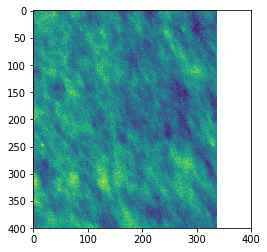

In [9]:
plt.imshow(cutout.data)